In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
file1 = "C:/Users/rache/Documents/University of Southern California/2023-2024 Year 4/GEOL 599 Environmental data science/data/HW3_LA_AQS_2023.csv"
aqs= pd.read_csv(file1)
aqs.head()

,State Code,County Code,Site Number,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Duration Description,...,AQI,Daily Criteria Indicator,Tribe Name,State Name,County Name,City Name,Local Site Name,Address,MSA or CBSA Name,Data Source
0,6,37,1103,68103,1,34.06659,-118.22688,WGS84,Ambient Min Temperature,24 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
1,6,37,1103,42602,3,34.06659,-118.22688,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,16,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
2,6,37,1103,62201,1,34.06659,-118.22688,WGS84,Relative Humidity,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
3,6,37,1103,62101,1,34.06659,-118.22688,WGS84,Outdoor Temperature,1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart
4,6,37,1103,42603,1,34.06659,-118.22688,WGS84,Oxides of nitrogen (NOx),1 HOUR,...,.,Y,NaN,California,Los Angeles,Los Angeles,Los Angeles-North Main Street,"1630 N MAIN ST, LOS ANGELES","Los Angeles-Long Beach-Anaheim, CA",AQS Data Mart


In [3]:
print(aqs["Parameter Name"].unique())
print(aqs["Duration Description"].unique())

['Ambient Min Temperature' 'Nitrogen dioxide (NO2)' 'Relative Humidity'
 'Outdoor Temperature' 'Oxides of nitrogen (NOx)'
 'Wind Direction - Scalar' 'Sample Min Baro Pressure'
 'Wind Direction - Resultant' 'Sample Max Baro Pressure'
 'Elapsed Sample Time' 'Average Ambient Temperature'
 'Ambient Max Temperature' 'Ultraviolet radiation' 'Solar radiation'
 'Sample Flow Rate- CV' 'Wind Speed - Scalar' 'Wind Speed - Resultant'
 'Average Ambient Pressure' 'Sample Volume' 'Ozone' 'Barometric pressure'
 'PM2.5 - Local Conditions' 'PM10 Total 0-10um STP' 'Carbon monoxide'
 'Sulfur dioxide' 'Nitric oxide (NO)' 'NOy - NO'
 'Reactive oxides of nitrogen (NOy)' 'OC1 CSN_Rev Unadjusted PM2.5 LC'
 'Sample Volume - Teflon Filter' 'Sample Flow Rate CV - Nylon Filter'
 'Sample Volume - Nylon Filter' 'Sample Volume - Quartz Filter'
 'Soil PM2.5 LC' 'Reconstructed Mass PM2.5 LC' 'EC1 PM2.5 LC'
 'EC2 PM2.5 LC' 'EC3 CSN_Rev Unadjusted PM2.5 LC'
 'OC CSN_Rev Unadjusted PM2.5 LC TOT' 'OC2 CSN_Rev Unadjusted PM

In [4]:
O3 = aqs[(aqs["Parameter Name"]=="Ozone")] #&(aqs["Duration Description"]=="1 HOUR")
# O3.head()
# O3.columns
O3["Arithmetic Mean"] = O3["Arithmetic Mean"]*1000 #Convert to ppb

C:\Users\rache\AppData\Local\Temp\ipykernel_16940\718522049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O3["Arithmetic Mean"] = O3["Arithmetic Mean"]*1000 #Convert to ppb


Text(0, 0.5, 'Count')

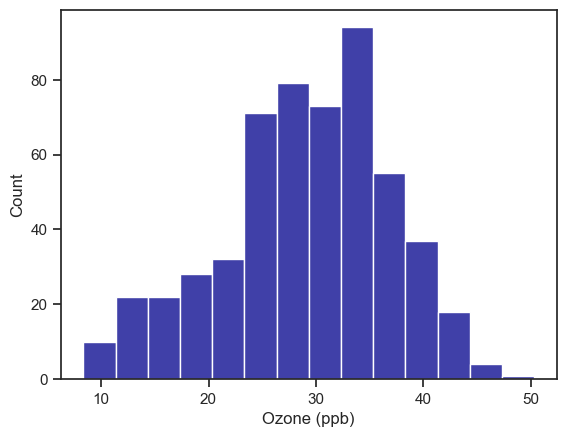

In [76]:
sns.set_theme(style="ticks")
O3plot = sns.histplot(data=O3, x="Arithmetic Mean", color= "darkblue", binwidth= 3)
O3plot.set_xlabel("Ozone (ppb)")
O3plot.set_ylabel("Count")
# Interpretation: Nearly all values of ozone measurements fall within the range of 10-50 ppb with the mode being a little above 30. The data seems to have a univariate distribution.

In [6]:
NO2 = aqs[aqs["Parameter Name"]=="Nitrogen dioxide (NO2)"]
# NO2["Units of Measure"].head()
NO2.columns

Index(['State Code', 'County Code', 'Site Number', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name',
       'Duration Description', 'Pollutant Standard', 'Date (Local)', 'Year',
       'Day In Year (Local)', 'Units of Measure', 'Exceptional Data Type',
       'Nonreg Observation Count', 'Observation Count', 'Observation Percent',
       'Nonreg Arithmetic Mean', 'Arithmetic Mean',
       'Nonreg First Maximum Value', 'First Maximum Value',
       'First Maximum Hour', 'AQI', 'Daily Criteria Indicator', 'Tribe Name',
       'State Name', 'County Name', 'City Name', 'Local Site Name', 'Address',
       'MSA or CBSA Name', 'Data Source'],
      dtype='object')

Text(0.5, 0, 'Nitrogen dioxide (ppb)')

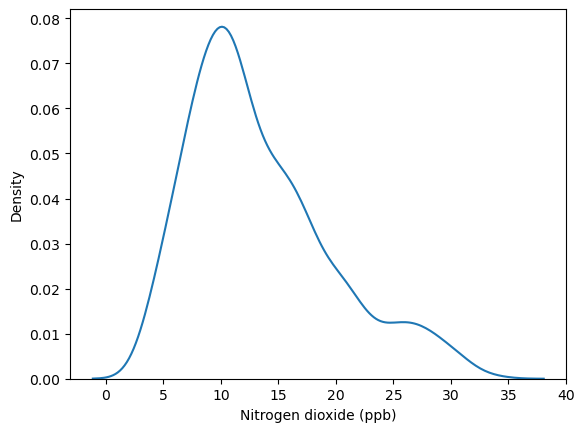

In [7]:
sns.set_theme(style="ticks")
NO2plot = sns.kdeplot(data= NO2, x= "Arithmetic Mean")
NO2plot.set_xlabel("Nitrogen dioxide (ppb)")
# Interpretation: All values of NO2 measurements fall in the range of 0-40 ppb with most values around 10 ppb. The distribution seems bivariate with one peak around 10 ppb and another much smaller peak just above 25 ppb.

In [8]:
# Select only the needed columns from the ozone and NO2 data to simplify the dataframes.
O3_sel = O3[["Parameter Name","Date (Local)","Arithmetic Mean"]]
NO2_sel = NO2[["Parameter Name","Date (Local)","Arithmetic Mean"]]
O3_NO2 = O3_sel.merge(NO2_sel, on= "Date (Local)")
O3_NO2.head()

,Parameter Name_x,Date (Local),Arithmetic Mean_x,Parameter Name_y,Arithmetic Mean_y
0,Ozone,2023-01-01,31.708,Nitrogen dioxide (NO2),4.816667
1,Ozone,2023-01-01,31.708,Nitrogen dioxide (NO2),4.550000
2,Ozone,2023-01-01,31.708,Nitrogen dioxide (NO2),4.550000
3,Ozone,2023-01-01,31.708,Nitrogen dioxide (NO2),4.816667
4,Ozone,2023-01-01,28.412,Nitrogen dioxide (NO2),4.816667


Text(0, 0.5, 'Nitrogen dioxide (ppb)')

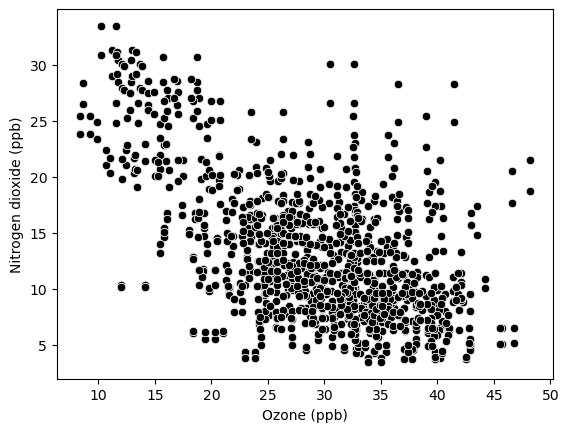

In [9]:
sns.set_theme(style="ticks")
O3_NO2plot = sns.scatterplot(data=O3_NO2, x="Arithmetic Mean_x", y="Arithmetic Mean_y", color='black')
O3_NO2plot.set_xlabel("Ozone (ppb)")
O3_NO2plot.set_ylabel("Nitrogen dioxide (ppb)")
# Interpretation: There is a broad negative correlation between ozone and nitrogen dioxide. However, above 30 ppb of ozone, there is more scatter in the NO2 values. 

In [10]:
O3_sel.head() 

,Parameter Name,Date (Local),Arithmetic Mean
20,Ozone,2023-01-01,31.708
21,Ozone,2023-01-01,28.412
64,Ozone,2023-01-02,15.792
65,Ozone,2023-01-02,19.353
204,Ozone,2023-01-03,25.000


In [11]:
# Add a column showing just the month and day to the ozone data
O3_sel["Date (Local)"] = pd.to_datetime(O3_sel["Date (Local)"])
O3_sel["Month"] = O3_sel["Date (Local)"].dt.month
O3_sel["Day"] = O3_sel["Date (Local)"].dt.day

C:\Users\rache\AppData\Local\Temp\ipykernel_16940\3271984240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O3_sel["Date (Local)"] = pd.to_datetime(O3_sel["Date (Local)"])
C:\Users\rache\AppData\Local\Temp\ipykernel_16940\3271984240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O3_sel["Month"] = O3_sel["Date (Local)"].dt.month
C:\Users\rache\AppData\Local\Temp\ipykernel_16940\3271984240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [12]:
O3_sel.head(20)

,Parameter Name,Date (Local),Arithmetic Mean,Month,Day
20,Ozone,2023-01-01,31.708,1,1
21,Ozone,2023-01-01,28.412,1,1
64,Ozone,2023-01-02,15.792,1,2
65,Ozone,2023-01-02,19.353,1,2
204,Ozone,2023-01-03,25.000,1,3
205,Ozone,2023-01-03,19.235,1,3
228,Ozone,2023-01-04,20.500,1,4
229,Ozone,2023-01-04,27.588,1,4
271,Ozone,2023-01-05,27.375,1,5
272,Ozone,2023-01-05,19.176,1,5


In [13]:
O3_sel35 = O3_sel[O3_sel["Arithmetic Mean"]>35] # Subset just the data entries with ozone > 35 ppb
O3_sel35 = O3_sel35.drop_duplicates(subset=["Month","Day"], keep= "first") # Remove duplicate ozone measurements with >35 ppb on the same day
O3_sel35[O3_sel35["Month"]==3].head(20)

,Parameter Name,Date (Local),Arithmetic Mean,Month,Day
5235,Ozone,2023-03-01,40.250,3,1
5577,Ozone,2023-03-05,38.235,3,5
5993,Ozone,2023-03-09,36.412,3,9
6947,Ozone,2023-03-19,35.529,3,19
7130,Ozone,2023-03-21,41.381,3,21
7337,Ozone,2023-03-24,42.875,3,24
7451,Ozone,2023-03-25,44.176,3,25
7679,Ozone,2023-03-26,42.917,3,26
7745,Ozone,2023-03-28,43.000,3,28
7883,Ozone,2023-03-29,40.250,3,29


In [14]:
# Count the number of entries per month
O3_sel35_sum = O3_sel35.groupby(['Month']).count()
O3_sel35_sum = O3_sel35_sum[["Arithmetic Mean"]].reset_index()
O3_sel35_sum

,Month,Arithmetic Mean
0,2,5
1,3,10
2,4,21
3,5,15
4,6,4
5,7,15
6,8,4
7,9,14


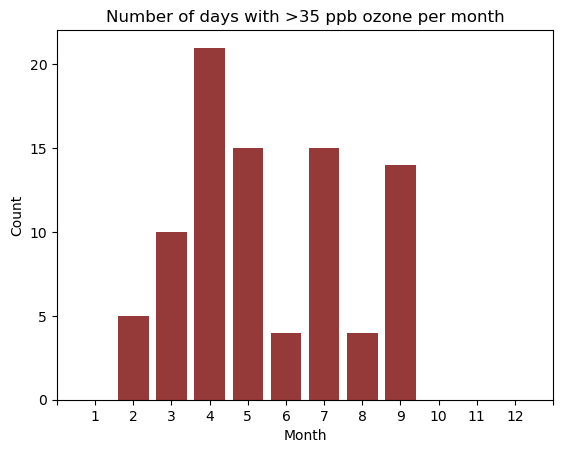

In [15]:
sns.set_theme(style="ticks")
O3_35plot = sns.barplot(data=O3_sel35_sum, x="Month", y="Arithmetic Mean", color='brown')
O3_35plot.set(xlabel ="Month", ylabel = "Count")
O3_35plot.set_title('Number of days with >35 ppb ozone per month')
O3_35plot.set_xticks(range(-2,12))
O3_35plot.set_xticklabels(['','1','2','3','4','5','6','7','8','9','10','11','12',''])
O3_35plot.set_yticks(range(0,25,5))
plt.show()
# Interpretation: April is the month with the most days where ozone was above 35 ppb. Oct-Jan do not have any days with ozone above 35 ppb so it seems ozone is lower in concentration during winter months.

In [17]:
file2 = "C:/Users/rache/Documents/University of Southern California/2023-2024 Year 4/GEOL 599 Environmental data science/data/HW5_MaunaLoa_CO2.csv"
CO2= pd.read_csv(file2)
CO2.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


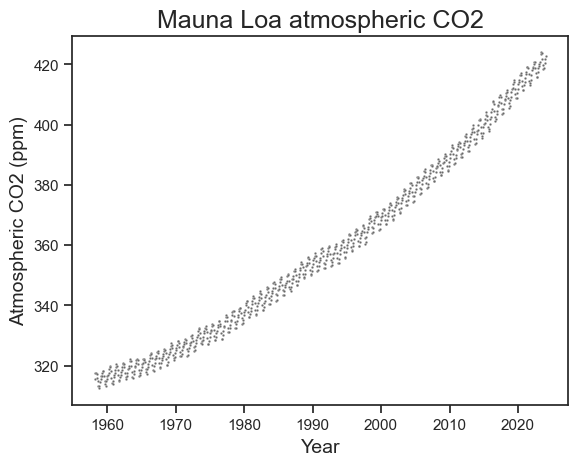

In [75]:
# Normal CO2 plot
sns.set_theme(style="ticks")
CO2plot = sns.scatterplot(data=CO2, x="decimal date", y="average", color='dimgray', s= 3)
CO2plot.set_title('Mauna Loa atmospheric CO2', fontsize= 18)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("Atmospheric CO2 (ppm)", fontsize= 14)
plt.show()

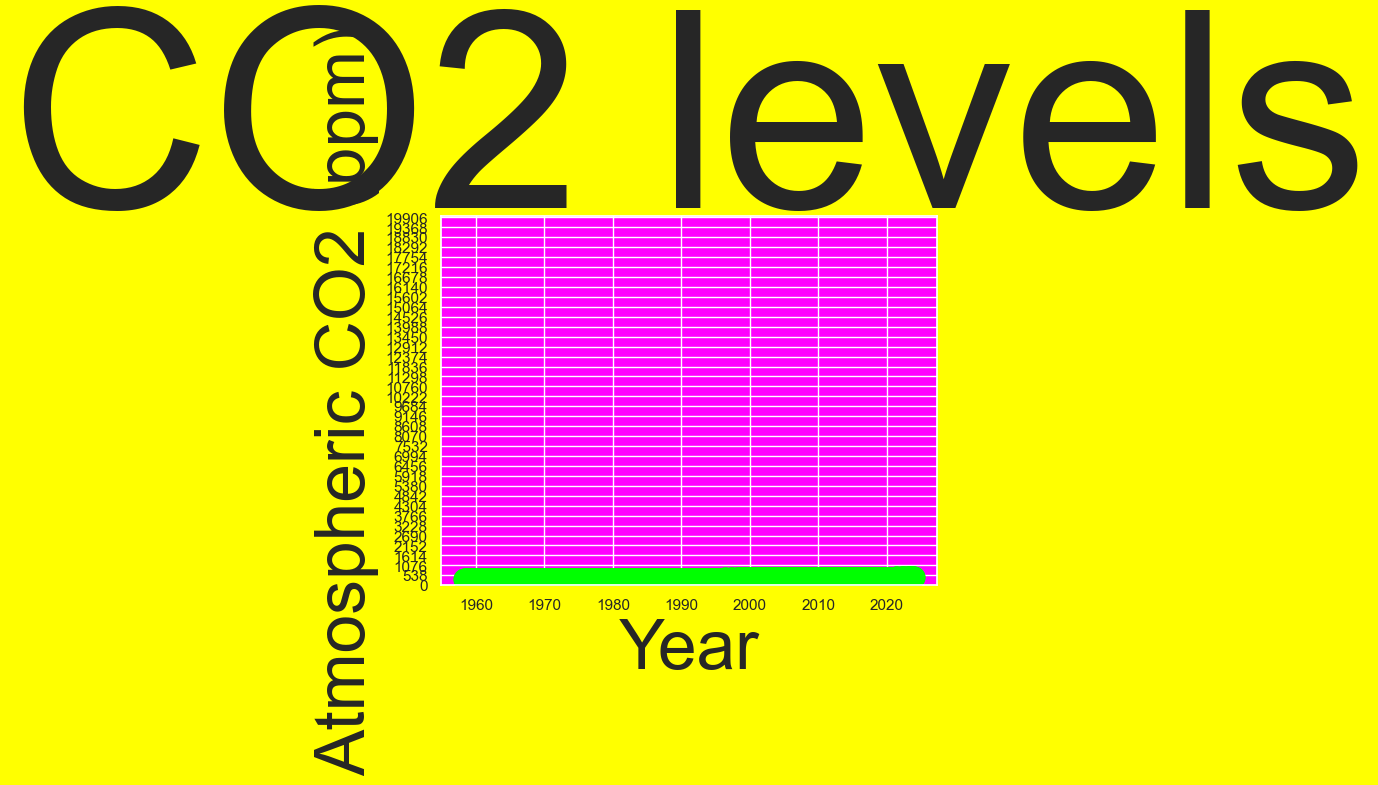

In [80]:
# Should-not-exist CO2 plot
sns.set(rc={"axes.facecolor": "fuchsia", "figure.facecolor": "yellow"})
CO2plot = sns.scatterplot(data=CO2, x="decimal date", y="average", color='lime', linewidth= 0, s= 250)
CO2plot.set_title('CO2 levels', fontsize= 200)
CO2plot.set_yticks(range(0,20000,538))
CO2plot.set_ylim(0,20000)
plt.xlabel("Year", fontsize= 50)
plt.ylabel("Atmospheric CO2 (ppm)", fontsize= 50)
plt.show()